<a href="https://colab.research.google.com/github/zenikigai/Pengembangan_Machine_Learning_IDcamp2023/blob/main/style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Style Transfer

Neural style transfer or simply style transfer is one example of an application of computer vision. In Style transfer, 2 images are one original image, and one image of the style we want will be combined into a new image.

In this example we will use 2 images:

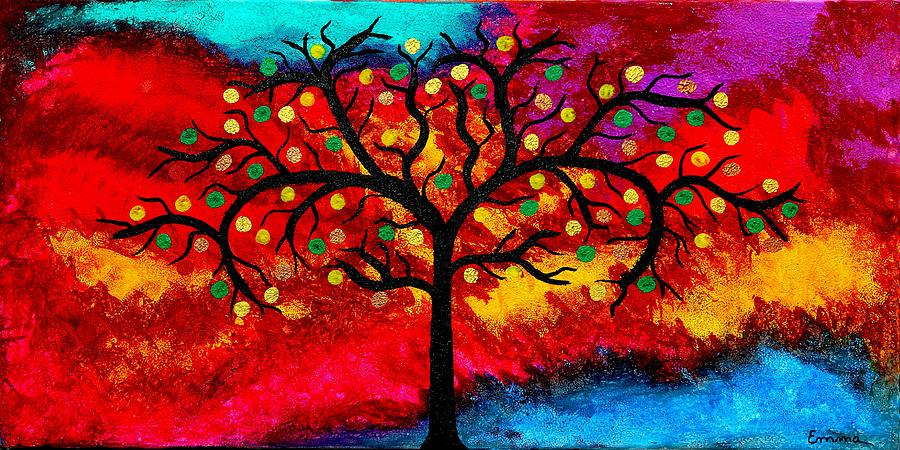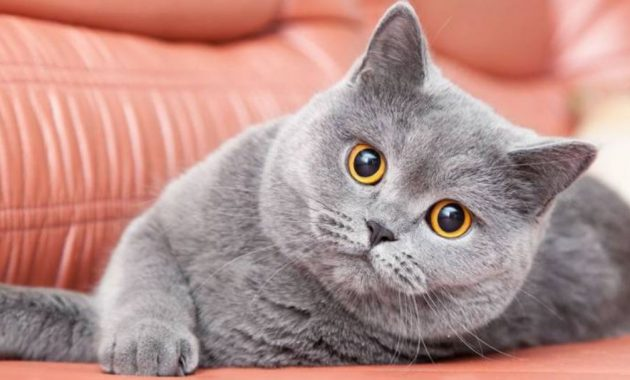

The very first thing we do is create a function to convert tensors into images. We need to convert the tensor to an image because, the model we use from the tensorflow hub will return a value with tensor format. The code below is a function to convert tensor to image. Remember that a tensor is a set of data in N dimensions. For example, a matrix is a 2-dimensional tensor.

In [12]:
import tensorflow as tf
# import numpy as np
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor) > 3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In addition to returning a value in tensor, the model we will use from the tensorflow hub also accepts input in the form of a tensor. So we have to change the image that we will use to tensor first. The code below is a function to convert an image to a tensor.


Then you put the cat picture and painting into Collab.

In [6]:
def image_to_tensor(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

  # resize image to spesific dimention
  img = tf.image.resize(img, [512, 512])
  img = img[tf.newaxis, :]
  return img

Then we convert the image that we uploaded to the Colaboratory earlier into tensor form

In [7]:
kucing_tensor = image_to_tensor("/content/kucing.jpg")
style_tensor = image_to_tensor("/content/style.jpg")

Finally, run the code below to style transfer our image and display the result.

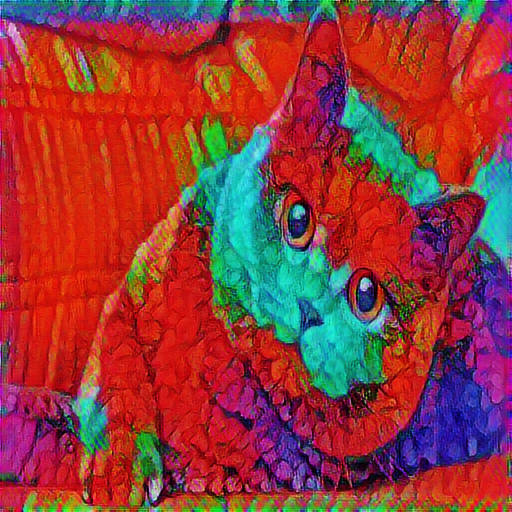

In [13]:
# style transfer
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools

hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(kucing_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)